<a href="https://colab.research.google.com/github/znsb1980-oss/titanic/blob/main/titanic%F0%9F%9B%B3%EF%B8%8F%F0%9F%9A%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [4]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill Null Values


In [8]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

In [9]:
train_data=train_data.drop(['Cabin'],axis=1)

In [10]:
print(train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [12]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Visualization

In [13]:
print(train_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

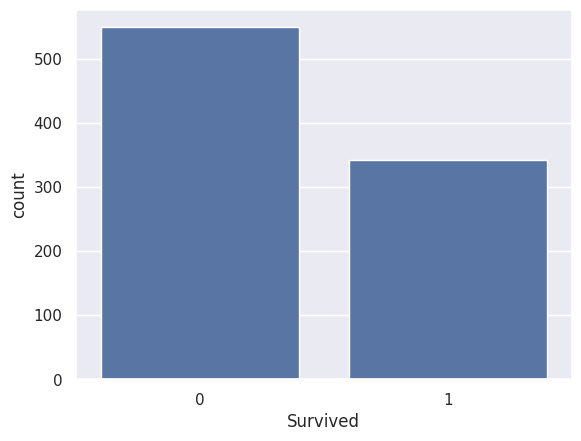

In [15]:
sns.countplot(x='Survived',data=train_data)

In [16]:
print(train_data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

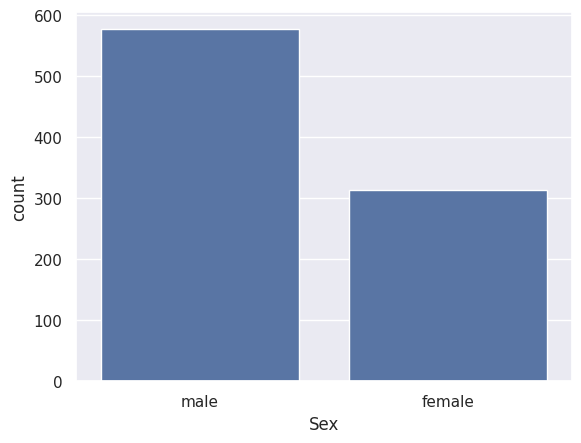

In [17]:
sns.countplot(x='Sex',data=train_data)

<Axes: xlabel='Sex', ylabel='count'>

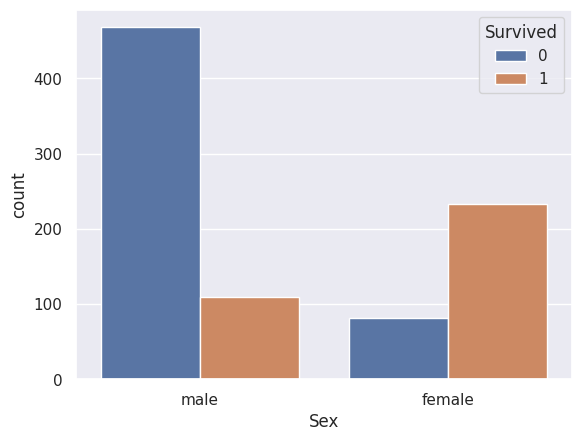

In [18]:
sns.countplot(x='Sex',hue='Survived',data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

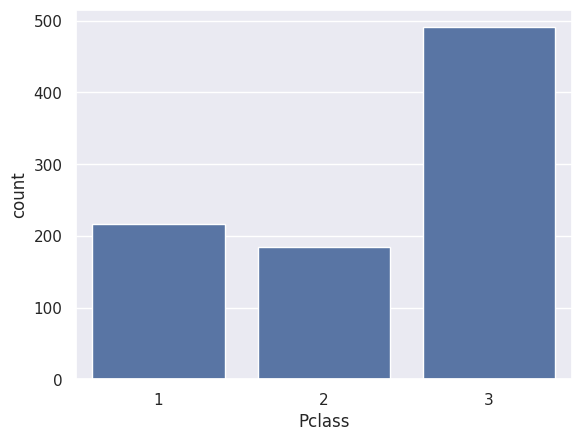

In [19]:
sns.countplot(x='Pclass',data=train_data)

<Axes: xlabel='Pclass', ylabel='count'>

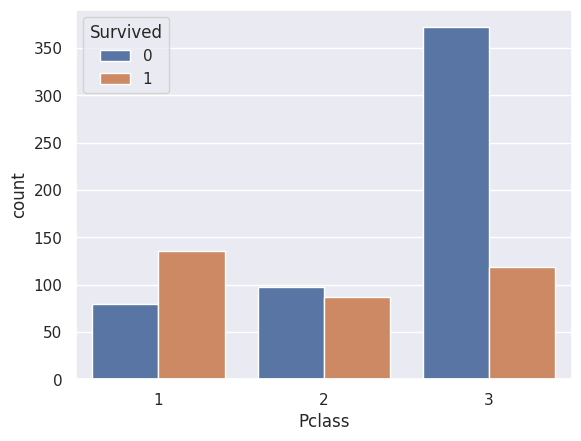

In [20]:
sns.countplot(x='Pclass',hue='Survived',data=train_data)

Encoding

In [21]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [22]:
train_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

/tmp/ipython-input-1898912477.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [23]:
X_train = train_data.drop(columns = ['PassengerId','Survived','Ticket','Name'],axis=1)
Y_train = train_data['Survived']

In [24]:
X_train.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0

In [25]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Modeling using Logistic Regression

In [26]:
Model = LogisticRegression()

In [27]:
Model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
X_train_prediction = Model.predict(X_train)
training_accuracy = accuracy_score(Y_train, X_train_prediction)
print( training_accuracy)

0.8047138047138047


In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



moding using:decision tree


In [30]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [31]:
model_dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
X_train_prediction_dt = model_dt.predict(X_train)
training_accuracy_dt = accuracy_score(Y_train, X_train_prediction_dt)
print( training_accuracy_dt)

0.9820426487093153


In [33]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,X_train_prediction_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891



test prerocessing

In [34]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [36]:
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Fill Null Values in Test

In [37]:
train_data.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex        Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  22.000000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                             Heikkinen, Miss. Laina    1  26.000000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                           Allen, Mr. William Henry    0  35.000000      0   
5                                   Moran, Mr. James    0  29.699118      0   
6                            McCarthy, Mr. Timothy J    0  54.000000      0   
7                     Palsson, Master. Gosta Leonard    0   2.000000      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1  27.000000      0   
9                Nasser, Mrs. Nicholas (Adele Achem)    1  14.000000      1   

   Parch            Ticket     Fare  Embarked  
0      0         A/5 21171   7.2500         0  
1      0          PC 17599  71.2833         1  
2      0  STON/O2. 3101282   7.9250         0  
3      0            113803  53.1000         0  
4      0            373450   8.0500         0  
5      0            330877   8.4583         2  
6      0             17463  51.8625         0  
7      1            349909  21.0750         0  
8      2            347742  11.1333         0  
9      0            237736  30.0708         1

In [38]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())

In [39]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [40]:
test_data=test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

/tmp/ipython-input-3882233870.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data=test_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})


In [41]:
test_data.head(10)

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   
5          897       3                    Svensson, Mr. Johan Cervin    0   
6          898       3                          Connolly, Miss. Kate    1   
7          899       2                  Caldwell, Mr. Albert Francis    0   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)    1   
9          901       3                       Davies, Mr. John Samuel    0   

    Age  SibSp  Parch     Ticket     Fare Cabin  Embarked  
0  34.5      0      0     330911   7.8292   NaN         2  
1  47.0      1      0     363272   7.0000   NaN         0  
2  62.0      0      0     240276   9.6875   NaN         2  
3  27.0      0      0     315154   8.6625   NaN         0  
4  22.0      1      1    3101298  12.2875   NaN         0  
5  14.0      0      0       7538   9.2250   NaN         0  
6  30.0      0      0     330972   7.6292   NaN         2  
7  26.0      1      1     248738  29.0000   NaN         0  
8  18.0      0      0       2657   7.2292   NaN         1  
9  21.0      2      0  A/4 48871  24.1500   NaN         0

In [42]:
test_data.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [43]:
print(test_data.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         2
1       3    1  47.0      1      0   7.0000         0
2       2    0  62.0      0      0   9.6875         2
3       3    0  27.0      0      0   8.6625         0
4       3    1  22.0      1      1  12.2875         0


In [47]:
label ={0: "Not Survived", 1: "Survived"}

Pclass = int(input("Enter class of the passenger (1, 2, 3): "))
Sex = int(input("Enter sex of the passenger (1 = female, 0 = male): "))
Age = float(input("Enter age of the passenger: "))
SibSp = int(input("Enter number of siblings/spouses aboard: "))
Parch = int(input("Enter number of parents/children aboard: "))
Fare = float(input("Enter fare of the passenger: "))
Embarked = int(input("Enter port of embarkation (1 = Cherbourg, 2 = Queenstown, 0 = Southampton"))

# 3. Prepare input in the format expected by the model
input_data = np.array([[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]])

# 4. Make prediction
prediction = model_dt.predict(input_data)[0]

# 5. Translate prediction to human-readable format
result = label[prediction]

# 6. Print full explanation
print("__________________________________________________________________")
print("ðŸš¢ðŸŒŠ Titanic Survival Prediction:")
print("The Person with:")
print(f"Class: {Pclass}, Sex: {'Male' if Sex == 0 else 'Female'}, Age: {Age}, SibSp: {SibSp}, Parch: {Parch}, Fare: {Fare}, Embarked: {Embarked}")
print(f"Prediction: {result}")

Enter class of the passenger (1, 2, 3): 2
Enter sex of the passenger (1 = female, 0 = male): 0
Enter age of the passenger: 14.00000
Enter number of siblings/spouses aboard: 1
Enter number of parents/children aboard: 0
Enter fare of the passenger: 30.0708
Enter port of embarkation (1 = Cherbourg, 2 = Queenstown, 0 = Southampton1
__________________________________________________________________
ðŸš¢ðŸŒŠ Titanic Survival Prediction:
The Person with:
Class: 2, Sex: Male, Age: 14.0, SibSp: 1, Parch: 0, Fare: 30.0708, Embarked: 1
Prediction: Survived


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
